# SIMULE EL PRIMER SISTEMA CUÁNTICO NUEVO DESCRITO EN LA SECCIÓN 4.1.
## El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.
### 1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.
### RTA:


In [13]:
import numpy as np
from sys import stdin
arreglo = np.array([1, 2, 34, 5, 6])
indice = 0
valor_numerador = np.abs(arreglo[indice])**2
valor_denominador = np.linalg.norm(arreglo)**2
if valor_denominador == 0:
    raise ValueError("Error por división por 0")
resultado = (valor_numerador / valor_denominador).item()
print("Punto 1:\nLa probabilidad en la posición ", indice, "es de:", resultado, "%")


Punto 1:
La probabilidad en la posición  0 es de: 0.0008183306055646482 %


### 2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.
### RTA:

In [10]:

import numpy as np

vector_a = np.array([1, 2, 3, 4, 5, 6])
indice = 2

vector_b = np.array([(0 if i != indice else vector_a[i].item()) for i in range(len(vector_a))])
print("Punto 2:\nPrimer vector:", vector_a, "\nSegundo vector", vector_b)

vector_a = vector_a / np.linalg.norm(vector_a)
vector_b = vector_b / np.linalg.norm(vector_b)

producto_punto = np.vdot(vector_b, vector_a)
probabilidad = (np.abs(producto_punto))**2
resultado = probabilidad.item()

print("La probabilidad de transitar del primer vector al segundo es de:", resultado, "%")


Punto 2:
Primer vector: [1 2 3 4 5 6] 
Segundo vector [0 0 3 0 0 0]
La probabilidad de transitar del primer vector al segundo es de: 0.0989010989010989 %


# COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
### 1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación
### RTA:

In [16]:
import numpy as np

v_inicial = np.array([1, 0, 0])  # Vector inicial
v_final = np.array([0, 0, 1]) # Vector final
# Producto interno
transicion = np.dot(v_final.conj(), v_inicial)
    
# ´Probabilidad de transicion luego de la observacion
probabilidad_transicion = np.abs(transicion)**2
    
print("La probabilidad de transición es:", probabilidad_transicion)

La probabilidad de transición es: 0


### 2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.
### RTA:

In [9]:
import numpy as np

def calcular_media_varianza(observable, estado):
    # Comprobar si la matriz es hermítica
    if not np.allclose(observable, observable.conj().T):
        return "La matriz observable no es hermítica"

    # Media
    media = np.dot(estado.conj().T, np.dot(observable, estado)).real

    # Varianza
    estado_con_observable = np.dot(observable, estado)
    varianza = np.dot(estado.conj().T, np.dot(observable, estado_con_observable)).real - media ** 2

    return media, varianza

# Matriz observable hermítica y vector ket
observable = np.array([[1, 1j], [-1j, 2]])  
estado = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])

# Cálculo de media y varianza
media, varianza = calcular_media_varianza(observable, estado)

print("La media del observable es:", media.item())
print("La varianza del observable es:", varianza.item())


La media del observable es: 2.5000000000000004
La varianza del observable es: 0.25


### 3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.
### RTA:

In [14]:
import numpy as np

def calcular_probabilidad_transicion(observable, estado):
    # Calcula los valores y vectores propios de la matriz observable
    valores_propios, vectores_propios = np.linalg.eig(observable)

    # Calcula las probabilidades de transición a los vectores propios
    probabilidades_transicion = np.abs(np.dot(vectores_propios.conj().T, estado)) ** 2

    return valores_propios, probabilidades_transicion

# Datos
observable = np.array([[1, 0], [0, -1]])  # Ejemplo de matriz observable hermítica
estado = np.array([[1], [0]])  # Ejemplo de vector ket

valores_propios, probabilidades_transicion = calcular_probabilidad_transicion(observable, estado)
print("Valores propios del observable:", valores_propios)
print("Probabilidades de transición a los vectores propios:", probabilidades_transicion)



Valores propios del observable: [ 1. -1.]
Probabilidades de transición a los vectores propios: [[1.]
 [0.]]


### 4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.
### RTA:

In [15]:
import numpy as np

def calcular_estado_final(estado_inicial, matrices_unitarias):
    estado_actual = estado_inicial
    for matriz_unitaria in matrices_unitarias:
        estado_actual = np.dot(matriz_unitaria, estado_actual)
    return estado_actual

# datos
estado_inicial = np.array([1, 0])  
matrices_unitarias = [np.array([[0, 1], [1, 0]]), 
                      np.array([[1, 0], [0, 1]])]

estado_final = calcular_estado_final(estado_inicial, matrices_unitarias)
print("El estado final del sistema es:", estado_final)


El estado final del sistema es: [0 1]


# REALICE LOS SIGUIENTES PROBLEMAS E INCLUYALOS COMO EJEMPLOS
### Modele en su librería los problemas:


#### 4.3.1
#### Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.
### RTA:

In [5]:
import numpy as np

# Estado inicial
estado_inicial = np.array([1, 0])

# Matriz del operador Sx (spin en x)
Sx = np.array([[0, 1], [1, 0]])

# Aplicación del operador Sx al estado inicial
estado_resultante = np.dot(Sx, estado_inicial)

# Cálculo de la probabilidad de spin up y spin down
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Imprimir los resultados
print("Probabilidad de transición en spin up:", probabilidad_spin_up)
print("Probabilidad de transición en spin down:", probabilidad_spin_down)



Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


#### 4.3.2

#### Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.
### RTA:

Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


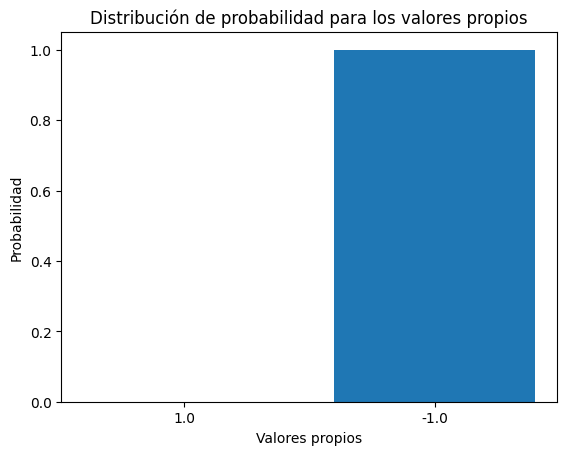

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial
estado_inicial = np.array([1, 0])

# Operador Sy (spin en y)
Sy = np.array([[0, 1], [1, 0]])

# Aplicación del operador Sy al estado inicial
estado_resultante = np.dot(Sy, estado_inicial)

# Cálculo de la probabilidad de spin up y spin down
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Imprimir los resultados
print("Probabilidad de transición en spin up:", probabilidad_spin_up)
print("Probabilidad de transición en spin down:", probabilidad_spin_down)

# Cálculo de los valores propios del operador Sy
valores_propios, _ = np.linalg.eig(Sy)

# Gráfico de la distribución de probabilidad para los valores propios
plt.bar(np.arange(len(valores_propios)), abs(estado_resultante)**2)
plt.xticks(np.arange(len(valores_propios)), valores_propios)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad para los valores propios')
plt.show()



### Desarrolle e incluya en el Github una discusión de los ejercicios: 

### 4.4.1

### Verify that
$ U_1= \begin{pmatrix} 0 & 1 \\ 1 & 0 \\ \end{pmatrix}and...U_2= \begin{pmatrix}  \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \end{pmatrix} $

### are unitary matrices. Multiply them and verify that their product is also unitary.
### RTA:

In [2]:
import numpy as np

# Matrices U1 y U2
U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

# Verificación de unitariedad de U1
unitaria_U1 = "es" if np.allclose(np.dot(U1.conj().T, U1), np.eye(2)) else "no es"

# Verificación de unitariedad de U2
unitaria_U2 = "es" if np.allclose(np.dot(U2.conj().T, U2), np.eye(2)) else "no es"

# Producto de U1 y U2
producto_U1_U2 = np.dot(U1, U2)

# Verificación de unitariedad del producto
producto_unitario = "es" if np.allclose(np.dot(producto_U1_U2.conj().T, producto_U1_U2), np.eye(2)) else "no es"

# Resultados
print("U1", unitaria_U1, "unitaria")
print("U2", unitaria_U2, "unitaria")
print("El producto de U1 y U2", producto_unitario, "unitario")


U1 es unitaria
U2 es unitaria
El producto de U1 y U2 es unitario


### 4.4.2
#### Regresa al Ejemplo 3.3.2 (bola de billar cuántica), mantén el mismo vector de estado inicial [1, 0, 0, 0]T, pero cambia el mapa unitario a

\begin{pmatrix} 0 & \frac{1}{\sqrt{2}}   & \frac{1}{\sqrt{2}}  & 0 \\ 
\frac{i}{\sqrt{2}} & 0  & 0 & \frac{1}{\sqrt{2}} \\ 
\frac{1}{\sqrt{2}} & 0  & 0 & \frac{i}{\sqrt{2}} \\ 
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 \\ 
\end{pmatrix}

#### Determina el estado del sistema después de tres pasos de tiempo. ¿Cuál es la probabilidad de que se encuentre la bola cuántica en el punto 3?

### RTA:

In [3]:
import numpy as np

# Mapa
mapa = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado_inicial = np.array([1, 0, 0, 0])

# Aplicar el mapa 3 veces
estado_final = np.linalg.matrix_power(mapa, 3) @ estado_inicial

# Calcular probabilidad
probabilidad_punto = np.abs(estado_final[2])**2

# Resultados
print("El estado del sistema después de 3 tiempos es:", estado_final)
print("Probabilidad de encontrar la bola cuántica en el punto 3:", probabilidad_punto)



El estado del sistema después de 3 tiempos es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en el punto 3: 0.0


#### Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).

### Desarrolle e incluya en el Github una discusión de los ejercicios 
#### 4.5.2 
##### Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).
#### RTA:
##### El vector de estado genérico para el sistema de dos partículas con espín, denotado como  ∣Ψ⟩, es el producto tensorial de los vectores de estado individuales:
$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle $
##### Para generalizar este concepto a un sistema con n partículas, podemos extender el producto tensorial para incluir todos los n vectores de estado individuales:
$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \ldots \otimes |\psi_n\rangle$

### 4.5.3
#### Supón el mismo escenario que en el Ejemplo 4.5.2 y deja
$ |\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle) $
#### ¿Es este estado separable?
#### RTA:
##### Teniendo ∣ϕ⟩  en terminos de estado de la base:
$|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle$

##### Intentamos expresar esto como un producto tensorial de dos estados. Buscaremos estados ∣α⟩ y ∣β⟩ tales que:
$ |\alpha\rangle \otimes |\beta\rangle = (a|x_0\rangle + b|x_1\rangle) \otimes (c|y_0\rangle + d|y_1\rangle) $
##### Expandiendo el producto tensorial, obtenemos:
$ |\alpha\rangle \otimes |\beta\rangle = ac|x_0\rangle \otimes |y_0\rangle + ad|x_0\rangle \otimes |y_1\rangle + bc|x_1\rangle \otimes |y_0\rangle + bd|x_1\rangle \otimes |y_1\rangle $

##### Comparando esto con la expresión para ∣ϕ⟩, podemos ver que es imposible encontrar coeficientes a, b, c y d de manera que las dos expresiones sean iguales. 
##### En conclusión el estado ∣ϕ⟩ dado por la Ecuación no es separable. Está entrelazado.

